This file demonstrates and visualizes the data processing that was done on the UA-Speech database

c:\users\jt\miniconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.
c:\users\jt\miniconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


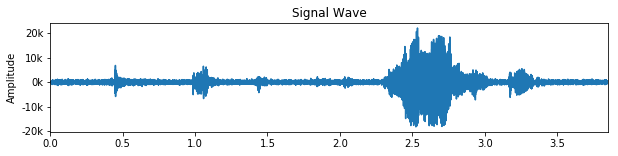

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open('nab/Data/SampleData/M05_B1_C13_M7.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = spf.getframerate()

time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(figsize=(10,2))
plt.title('Signal Wave')
plt.ylabel('Amplitude')
plt.plot(time, signal)
plt.xlim(0, time[-1])
plt.yticks([-20000, -10000, 0, 10000, 20000], ['-20k', '-10k', '0k', '10k', '20k'])
plt.show()

In [4]:
features = np.loadtxt('nab/Data/SampleData/features_M05_B1_C13_M7.txt')
features.shape

(383, 123)

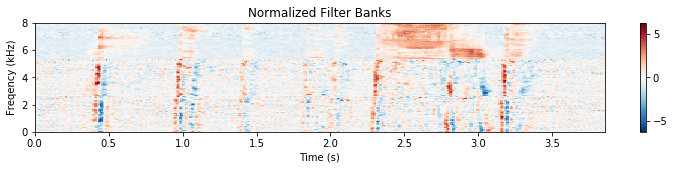

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(0, 8, features.shape[1]), np.linspace(0, time[-1], features.shape[0]))

z = np.flip(features, axis=1)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots(figsize=(12.77,2))

c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=z_max)
ax.set_title('Normalized Filter Banks')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.ylabel('Freqency (kHz)')
plt.xlabel('Time (s)')
plt.show()

In [108]:
f = open('nab/Data/alphabet.txt', 'r')
alph = f.read()
alph = alph.split()
alph.sort()

In [111]:
alph = ' '.join(alph)

In [112]:
alph

'aa0 aa1 aa2 ae0 ae1 ae2 ah0 ah1 ao1 ao2 aw1 aw2 ay0 ay1 ay2 b ch d dh eh0 eh1 eh2 er0 er1 er2 ey0 ey1 ey2 f g hh ih0 ih1 ih2 iy0 iy1 iy2 jh k l m n ng ow0 ow1 ow2 oy1 oy2 p r s sh t th uh1 uh2 uw0 uw1 uw2 v w y z zh'